<a href="https://colab.research.google.com/github/rudradeb1947/Emotion-Detection-Model/blob/main/Emotion_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd

# Load the datasets
train_df = pd.read_csv('train.txt', sep=';', names=['text', 'emotion'])
val_df = pd.read_csv('val.txt', sep=';', names=['text', 'emotion'])
test_df = pd.read_csv('test.txt', sep=';', names=['text', 'emotion'])
pd.read_csv('train.txt', sep=';', names=['text', 'emotion'])

,text,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


In [32]:
# Combine them if needed
df = pd.concat([train_df, val_df, test_df], ignore_index=True)

In [33]:
df['emotion'].value_counts()

,count
emotion,
joy,6761
sadness,5797
anger,2709
fear,2373
love,1641
surprise,719


In [34]:
!pip install neattext

              precision    recall  f1-score   support

       anger       0.92      0.82      0.86       540
        fear       0.85      0.79      0.82       442
         joy       0.85      0.96      0.90      1335
        love       0.88      0.68      0.77       332
     sadness       0.91      0.95      0.93      1195
    surprise       0.91      0.52      0.66       156

    accuracy                           0.88      4000
   macro avg       0.89      0.79      0.82      4000
weighted avg       0.88      0.88      0.88      4000



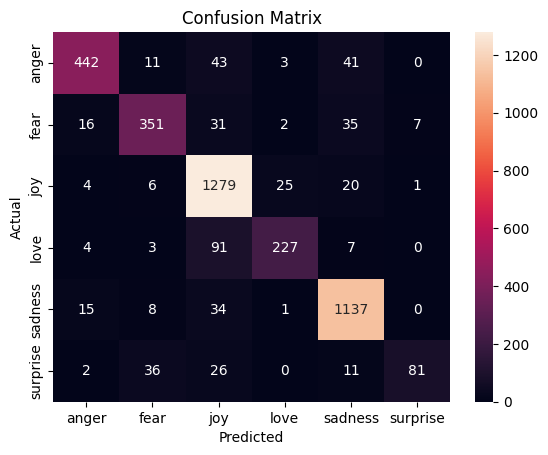

['emotion_detection_model.pkl']

In [35]:
import neattext.functions as nfx

# Text preprocessing
df['clean_text'] = df['text'].apply(nfx.remove_userhandles)
df['clean_text'] = df['clean_text'].apply(nfx.remove_stopwords)
df['clean_text'] = df['clean_text'].apply(nfx.remove_punctuations)

# Train-test split
from sklearn.model_selection import train_test_split
X = df['clean_text']
y = df['emotion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create pipeline
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
model_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('lr', LogisticRegression())
])

# Train
model_pipeline.fit(X_train, y_train)

# Predict and evaluate
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

# Visualize confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=model_pipeline.classes_, yticklabels=model_pipeline.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Save model
import joblib
joblib.dump(model_pipeline, 'emotion_detection_model.pkl')


In [36]:
# Load model
import joblib
model = joblib.load('emotion_detection_model.pkl')

# Input section
while True:
    user_input = input("Enter a sentence to detect emotion (or type 'exit' to quit): ")
    if user_input.lower() == 'exit':
        break
    prediction = model.predict([user_input])
    print(f"Predicted Emotion: {prediction[0]}")

Enter a sentence to detect emotion (or type 'exit' to quit): i am very excited to see
Predicted Emotion: joy
Enter a sentence to detect emotion (or type 'exit' to quit): i just got my dream job
Predicted Emotion: joy
Enter a sentence to detect emotion (or type 'exit' to quit): i am very afraid of my failures
Predicted Emotion: fear
Enter a sentence to detect emotion (or type 'exit' to quit): my girlfriend is very loyal
Predicted Emotion: love
Enter a sentence to detect emotion (or type 'exit' to quit): exit
